# Introduction

This is a new machine learning model which I create from scratch some time ago, it is a mathematical model of supervised learning and rule induction, which can be used both for data mining and for the creation of an expert system. Before starting with the definitions I will detail some of its characteristics.

**This model is still under experimentation, so any errors or mathematical dilemmas are open to discussion.**

---

Before starting with the definitions, I will detail some of its characteristics.
* **Entropy-free**: Unlike what we expect to do in a decision tree, this model does not need to calculate any impurity metrics, entropy, pruning, among others.
* **not sensitive to initial conditions**: The set of rules it induces are initially deterministic in nature (although these may change if merged with another model, such as a genetic algorithm).
* **Noise-free**: If the assumptions are met, and the classification is correctly done then the boundaries delimited by the model will always be the same(unless the independent variables or classes change).
* **Rule inductor**: It generates well-defined(1-cube according to Petrie notation) regions in Euclidean space, forming a hypercube in a trivial classification problem and k-hypercubes when the problem involves non-trivial classification(e.g. in the case of k-clusters), this makes more sense when working in high dimensions and the data must be separated.
* **Predictor**: Once the rules are extracted it is possible to use them for classification and prediction, either by means of a tree or some brute force method.

---

Necessary assumptions: *Initially the experiments were performed on uniform distributions, however this does not imply that they cannot be applied to Gaussian distributions, or to more complex cases such as problems of elliptic or spherical nature. Studying the formulations and effects of high-dimensional geometries (such as regular convex polytopes) is fundamental to determine the scope and use cases of this model.*




# Topics covered

1. Brief history of how i designed the hypercube model
2. About hypercubes
3. Polytopes and convexity
4. Petrie notation and polygons
5. Introduction to the Hypercube D-rule inductor algorithm(and his elements).
6. General understanding of the Hypercube model
7. Dependencies
8. First approach to the model: rule extraction using the standard deviation and mean criteria.
9. Implementation of the hypercube D-rule inductor with the standard deviation and mean criterion.
10. Experiment on uniform and K-Means distributions with the standard deviation criterion and mean.
11. Implementation of the linearization criterion of dimensions
12. Uniform distribution experiment with the criterion of linearization of dimensions
13. Final update of the Hypercube D-rule inductor model; prediction method, accuracy and hypercube intersection ratio.
14. Experiment in R3 with intersection ratio and adaptive clustering
15. 5-dimensional final experiment; prediction, time-series splitting with adaptive clustering and optimized rule extraction
16. Final comments and reflections.

# Brief history of how I designed the hypercube model



Initially I wanted to solve a graph theory problem, where I wanted to find a set of rules using a binary tree based on Euclidean distance metrics and techniques applied to graphs, as opposed to a decision tree using another approach; e.g. information theory, impurity concept, splitting and pruning among other considerations to obtain the root node and homogeneity between classes. However, we know that although these trees are excellent non-parametric methods, they have certain disadvantages, such as sensitivity to initial conditions and noise.

Both ideas have in common the generation and subsequent extraction of rules either in tree mode or using logical operators (such as disjunction) to unify these rules in the best possible order.

> I came to the conclusion that using the distance was just a way to find the best (though not the most optimal) path, selecting a minimum and a maximum distance to enclose in a graph a polygon(or polytope) in n-dimensions.
> The results were not entirely satisfactory because although the initial problem had been partially solved, it was necessary to use a kd-tree to store centroids or relevant points (previously discriminated and classified) and then assemble the model. What is the drawback with this?, the model will require the mandatory implementation of the kd-tree as well as the array of points used to train the model.

In other words: if we try to export this to any platform, the model will be completely exposed, in addition to requiring the mandatory implementation of this data structure.

*This is when it occurred to me to reformulate the problem by discarding the distance metrics and using hypercubes to enclose n-space regions...*

# About hypercubes
It is a compact and convex figure, which is formed by parallel straight segments opposite and aligned in each of the dimensions. It complies with the axioms of Euclidean geometry, so it retains the properties of perpendicularity and length.

There are many mathematical formalisms, however for practical reasons this publication will focus more on the implementation and application of the model rather than on the underlying formulas that justify its functionality.

**In general, it is a model that generalizes to n-dimensions a square or cube.**

---

On the other hand the hypercubes tessellate the Euclidean space, this means that they are a set of adjacent polyhedra that cover the whole space, leaving no holes.

# Polytopes and convexity

We understand a polytope as the n-dimensional generalization of a polygon for two dimensions and a polyhedron for three dimensions. We further assume that a polytope is convex, so the following property is satisfied.

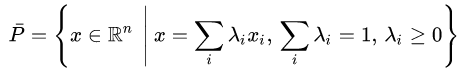

*A hypercube is a regular polytope.*

To synthesize the definition I will assume the definitions of affine sets, convex and non-convex sets, and convex-hulls.

---

**Discrete geometry**: studies the combinatorial properties of discrete geometric objects. Most questions in discrete geometry involve finite or discrete sets of basic geometric objects, such as points, lines, planes, circles, spheres, polygons, etc....

Discrete geometry focuses on the combinatorial properties of these objects, for example: how they intersect with each other, or how they can be arranged to cover a larger object. This branch has in common convex geometry and computational geometry, both of which are closely related to topics such as finite geometry, combinatorial optimization, among others...


# Petrie notation and polygons
It is possible to represent an n-cube in a plane by an orthogonal projection, generating a series of 2xN polygons.
In the following image (extracted from the wiki), we can see a representation of 16 hypercubes (or n-cubes according to Petrie's notation) projected on the plane.

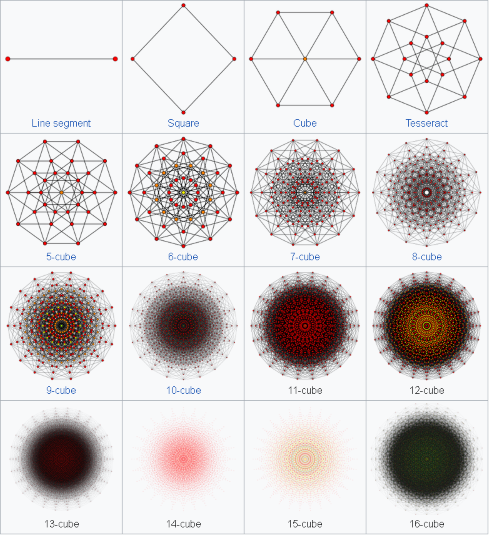

as we can appreciate these projections are useful to visualize the structure and symmetries of polytopes with many dimensions(hypercubes in this case). 

*From now on this article will adopt the petrie notation to name the generalization of the dimensions.*

# Introduction to the Hypercube D-Rule inductor algorithm.

The general idea is the following, starting from an n-dimensional dataset (with n>= 1) we will delimit the observations in "boundaries" determined by well-defined conditionals, once the *set of rules* is formed we must assign a *order of priority* for these and finally extract the *boundaries of each region*.

* **Boundaries of each region**: By limits we mean a bounded set, i.e. given an observation **x** e [a,b], which is the same as saying a <= x <= b.

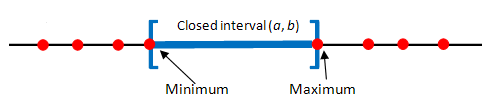

For this technique to work we first need to correctly cluster the data, which implies using a sizing or normalization algorithm as mentioned above.

---

* **Order of priority**: Criteria used to hierarchically define the set of rules(in descending order, the first being the most important).

* **Set of rules**: Once the initial steps have been carried out, we will be able to form the rule sets for subsequent extraction. This is part of the practical implementation.

## Elements of the algorithm steps.

1. Normalize the dataset(e.g. using the MinMaxScaler algorithm)
2. Cluster the information(e.g. using K-Means).
3. Pass the parameters to the model, these are;
* Data matrix (dataset), 
* Vector of clusters (i.e. the labels of the dataset).
* Number of dimensions to classify (size of columns of the data matrix).
* Criteria for obtaining boundaries (in principle i worked on two implementations; *standard deviation and mean*, and the *linearization of the dimensions* using a sort algorithm).
4. Train the model.
5. Extract the rules.


# General understanding of the Hypercube model.

Before the general implementation, let's look at the steps of the algorithm in detail. This will help us to understand how it is possible to constrain and classify regions in a hypercube.

1. **Obtaining k-clusters and determining the density of observations** corresponding to each k, this information will be internally stored in a *hashmap*, then for each list or cell we will have the frequency of the data.

2. **Computing the hypermatrix**; for it we run through each cluster (which will also contain the information extracted before). In each iteration we execute a matrix splitting method to "cut" the rows and columns that correspond to each cluster, in this way we will obtain independent matrices.

3. **Execute the criterion for obtaining boundaries**; at this point we will get a list of "hypervectors" which will contain information about the limits or boundaries of the hyperrectangles (the word hyper is supposed to represent the generalization of the n-dimensions, however for practical purposes these will be 2-vectors in a set or list).

The criteria I worked on for the implementation are two;
 * Criterion of the standard deviation and mean.
 * Criterion of linearized dimensions

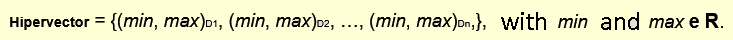

4. **Construct a "hyperlist", calculate the probability or density of the Ki-cluster and assign a class variable(label).** On the one hand, after the criterion of obtaining borders, the list will contain the borders of the hyperrectangles (this process is executed cluster by cluster), which are 2-vectors with components <min,max> separated by the corresponding dimension. Internally a marker is used to discriminate the dimension, being the classical label "Xi", which represents the generalization of the dimensions. Using the example of the hypervector in step(3), this would be:

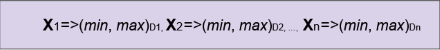

* We calculate the probability of each cluster (using the information from step (1)), this will be useful for the final step.
* *Optional*: As an additional metric we can assign a class variable, which stores the label or class of the cluster to which the observation corresponds, this will be very useful if we want to make a predictive model in the future.

5. **Priority order of the rule set**, As a final step we order the hypermatrix based on the probabilities calculated in step (4), this is fundamental because with this information a sort algorithm will tell us the priority of each rule, since the rules with higher density or weight will have relevance over those that are less frequent.

---

Once all the steps of the algorithm have been executed, the regions have been classified and their priority has been determined, we can extract the hyperrectangle boundaries in the form of well-defined conditions.
This is a trivial problem, because having the hypermatrix calculated and ordered correctly we will only have to encode the 2-vector hyperlist according to its components(minimum and maximum) in a set of dimension-to-dimension rules. By this we mean separating the components of the vectors by means of logical operators: such the set {“(”, “>=”, “^”, “<=”, “)”} in a list containing discrete or continuous values along with conditional relationships.


# Dependencies

> libraries to simplify some functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# First approach to the model: rule extraction using the standard deviation and mean criteria.

This is the first criterion I worked on, it is a simple and powerful idea to make our first experiments, both in the trivial case and in a general problem. We will also study the implications caused by this simplicity.

*The following image shows a simple outline of the underlying idea and the formulas we will use.*

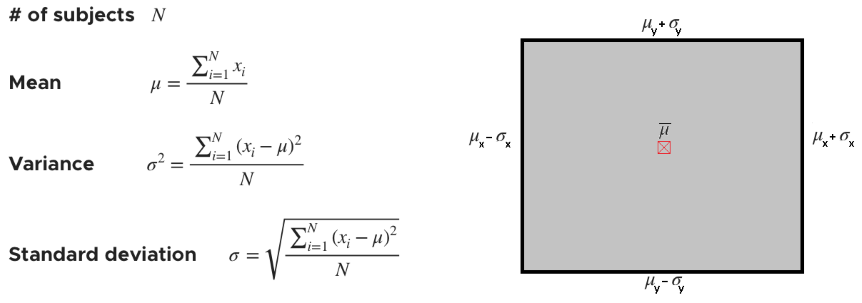

Let's move on to the implementation of the code

In [ ]:
class HiperCubeOneRuleInductor:
  def __init__(self, X:np.ndarray, dimension:int)->None:
    self.d_mean_vector = np.mean(X, axis=0)
    self.d_std_vector = np.std(X, axis=0)
    self.d_min_hiper_vector = self.d_mean_vector - self.d_std_vector
    self.d_max_hiper_vector = self.d_mean_vector + self.d_std_vector
    self.__dim = dimension

  def __explode_chain_rules(self, rules)->str:
    rules_ = ""
    for rule in rules:
      rules_+= "("+rule+")" + "^"
    return rules_[:-1]

  def fit_transform(self)->None:
    rules = list()
    for dim in range(0, self.__dim, 1):
      min_d = self.d_min_hiper_vector[dim]
      max_d = self.d_max_hiper_vector[dim]
      rule_min= "x"+str(dim)+">="+str(min_d)
      rule_max= "x"+str(dim)+"<="+str(max_d)
    
      rule = "("+rule_min+")" + "^" + "("+rule_max+")"
      rules.append(rule)
    
    return self.__explode_chain_rules(rules)

Let us then see an example in a 2-dimensional compact space (assuming a k-cluster with k=1).

    0   1
0   5   6
1   1   0
2  10   8
3   1  14
4  12   7
mean:[5.8 7. ]
variance:[4.53431362 4.47213595]
min:[1.26568638 2.52786405], max:[10.33431362 11.47213595]


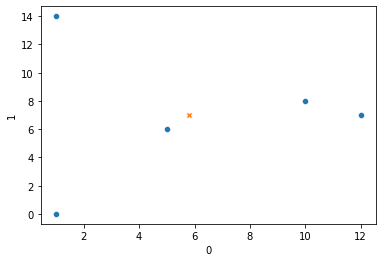

In [ ]:
mat2 = [(5,6), (1,0), (10,8), (1, 14), (12, 7)]
vec_mean = np.mean(mat2, axis=0)
vec_var = np.std(mat2, axis=0)
df_points = pd.DataFrame(mat2)

print( df_points )
print( "mean:{}".format(vec_mean) )
print( "variance:{}".format(vec_var) )
print( "min:{}, max:{}".format(vec_mean - vec_var, vec_mean + vec_var) )

sns.scatterplot(data=df_points, x=0, y=1)
sns.scatterplot(x=[vec_mean[0]], y=[vec_mean[1]], marker='X')
plt.show()

In this example we use **k=1** to mean that this is a trivial classification problem, or in other words: we are not using clustering or dimensioning, since we assume that the dataset is normalized or on a common scale (and for this example it is).
We see then that the center is determined by the vector **mean**, "min" and "max" here represent the minimum and maximum vector where the region of the z=0 plane must be discriminated.

*Now let's run the model and extract the rules*.

In [ ]:
# Where x0 = x, x1 = y
hc_one = HiperCubeOneRuleInductor(mat2, 2)
hc_one.fit_transform()

'((x0>=1.2656863804981464)^(x0<=10.334313619501852))^((x1>=2.5278640450004204)^(x1<=11.47213595499958))'

regions of the plan classified by the model

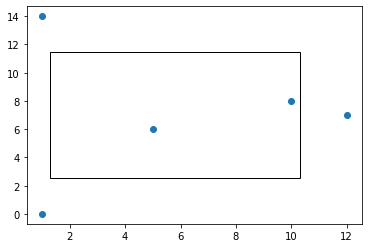

In [ ]:
plt.scatter(x=df_points[0], y=df_points[1])
rect = Rectangle((hc_one.d_min_hiper_vector[0], hc_one.d_min_hiper_vector[1]),
                 hc_one.d_max_hiper_vector[0] - hc_one.d_min_hiper_vector[0], hc_one.d_max_hiper_vector[1]-hc_one.d_min_hiper_vector[1], fill=False)
plt.gca().add_patch(rect)
plt.show()

However, as we can see, it does not correctly determine the boundaries... leaving points unclassified or outside the interval. As we can see this is a problem because the rules do not contain all the points, moreover we only take 1 standard deviation by default.

*This will be a serious drawback when we generalize the problem to R^N dimensions and cannot visualize them.*

# Implementation of the hypercube D-rule inductor with the standard deviation and mean criterion.

Let's assemble the whole model in a class together with the criteria studied so far.

In [ ]:
class HipercubeDRuleInductor:
  def __init__(self, X:np.ndarray, cluster:np.ndarray, dim:int, devs:float=1):
    self.__X = X
    self.__n = len(X)
    self.__C = cluster
    self.__D = dim
    self.devs = devs
    
    self.markers = {'min':'>=', 'max':'<=', 'and':'^'}
    self.__sorted_hipercube_matrix = None

  def __get_total_clusters(self, cluster:np.ndarray)->dict:
    c_info = dict()
    for c in cluster:
      if c in c_info:
        c_info[c]+= 1
      else:
        c_info[c] = 1

    return c_info
    
  def __split_matrix(self, X:np.ndarray, cluster:np.ndarray, k:int)->list:
    cluster_matrix = list()
    for Xi, c in zip(X, cluster):
      if c == k:
        cluster_matrix.append(Xi)

    return cluster_matrix

  def __rule_extractor(self, min_hiper_vector:np.array, max_hiper_vector:np.array)->list:
    rules = list()
    for dim in range(0, self.__D, 1):
      min_d = min_hiper_vector[dim]
      max_d = max_hiper_vector[dim]
      rule_min= "x"+str(dim)+self.markers['min']+str(min_d)
      rule_max= "x"+str(dim)+self.markers['max']+str(max_d)
    
      rule = "("+rule_min+")" + self.markers['and'] + "("+rule_max+")"
      rules.append(rule)
    
    return rules

  def __rules_extractor(self, hipercube_matrix:list):
    rules = list()
    for hc in hipercube_matrix:
      rules.append( self.__rule_extractor(hc['min'], hc["max"]) )

    return rules

  def __compute_hipercube_matrix(self, clusters:dict)->list:
    hipercube_matrix = list()
    for c, t in clusters.items():
      mat = self.__split_matrix(self.__X, self.__C, c)
      d_mean = np.mean(mat, axis=0)
      d_std = self.devs * np.std(mat, axis=0)
      hipercube_min = d_mean - d_std
      hipercube_max = d_mean + d_std
      # hiperlist
      hipercube_matrix.append( {'min':hipercube_min, 'max':hipercube_max, 'proba':t / self.__n, 'class':c} )

    return hipercube_matrix

  def fit_transform(self):
    c_info:dict = self.__get_total_clusters(self.__C)
    hipercube_matrix= self.__compute_hipercube_matrix(c_info)
    self.__sorted_hipercube_matrix = sorted(hipercube_matrix, key=lambda X: X['proba'], reverse=True)

  @property
  def rules_list(self)->list:
    return self.__rules_extractor(self.__sorted_hipercube_matrix)
  
  @property
  def hipervector_list(self)->list:
    return self.__sorted_hipercube_matrix

# Experiment on uniform and K-Means distributions with the standard deviation criterion and mean.

In a previous study we used the standard deviation and mean criterion and analyzed in a simple experiment the implications of classifying the model, now it is time to generalize the problem to k-clusters with n-observations and update our experiment using a uniform distribution.

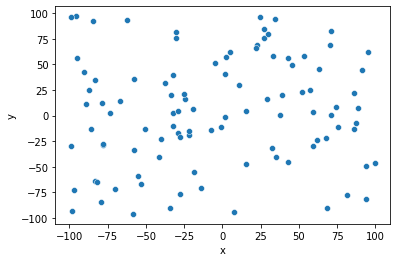

In [ ]:
x = np.random.uniform(low=-100,high=100, size=100)
y = np.random.uniform(low=-100,high=100, size=100)
df_unif = pd.DataFrame(data={'x':x,'y':y})

sns.scatterplot(data=df_unif, x='x',y='y')
plt.show()

Let's use the KMeans (by dimensioning the observations) to classify the regions by clusters.

> *initially in these experiments the selected k-parameter is irrelevant...*

In [ ]:
kmeans = KMeans(n_clusters=4).fit(MinMaxScaler().fit_transform(df_unif))
df_unif["cluster"] = kmeans.labels_
df_unif.head()

,x,y,cluster
0,-14.197685,-70.709549,3
1,59.581009,-29.275723,0
2,-62.535546,92.858154,1
3,27.027792,76.196220,2
4,37.540828,1.076061,0


Let's see the result of the well sorted distribution.

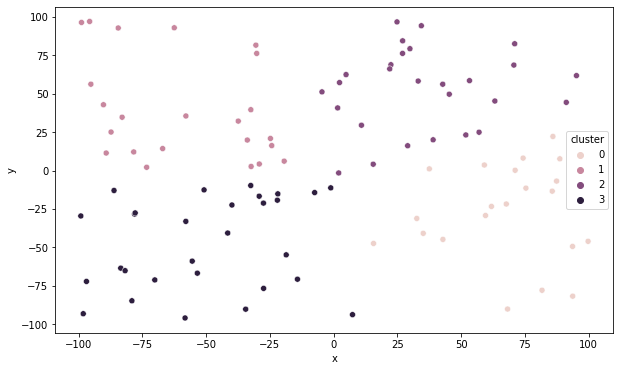

In [ ]:
plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_unif, x='x',y='y', hue='cluster')
plt.show()

Let's check the general model using the vector of clusters classified by K-Means

In [ ]:
hc_inductor = HipercubeDRuleInductor(df_unif[['x', 'y']].values, df_unif['cluster'].values, 2, devs=1.5)
hc_inductor.markers['and'] = 'and'
hc_inductor.fit_transform()

hc_inductor.rules_list

[['(x0>=-95.2645382040053)and(x0<=-3.9197273507710335)',
  '(x1>=-91.52744234333784)and(x1<=-3.165250750535371)'],
 ['(x0>=-3.8789113402275675)and(x0<=75.23952145339263)',
  '(x1>=13.843265993499983)and(x1<=91.19451609436709)'],
 ['(x0>=-100.82088125621706)and(x0<=-17.293955757110915)',
  '(x1>=-9.290839998790851)and(x1<=88.60225571608652)'],
 ['(x0>=33.37609634396648)and(x0<=101.71694090865233)',
  '(x1>=-73.07501227585723)and(x1<=18.490255188564284)']]

We see that the **4xK** rules in the generated 2-cube are well defined.

**Extraction of the regions of the 2-cube, their probability density and class**.

In [ ]:
hc_inductor.hipervector_list

[{'class': 3,
  'max': array([-3.91972735, -3.16525075]),
  'min': array([-95.2645382 , -91.52744234]),
  'proba': 0.29},
 {'class': 2,
  'max': array([75.23952145, 91.19451609]),
  'min': array([-3.87891134, 13.84326599]),
  'proba': 0.27},
 {'class': 1,
  'max': array([-17.29395576,  88.60225572]),
  'min': array([-100.82088126,   -9.29084   ]),
  'proba': 0.23},
 {'class': 0,
  'max': array([101.71694091,  18.49025519]),
  'min': array([ 33.37609634, -73.07501228]),
  'proba': 0.21}]

Let's visualize the regions delimited by the hypercube

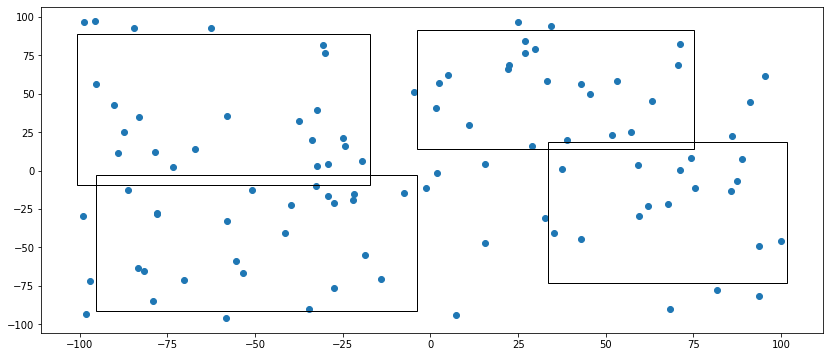

In [ ]:
plt.subplots(figsize=(14,6))
plt.scatter(x=df_unif['x'], y=df_unif['y'])
for hipervector in hc_inductor.hipervector_list:
  rect = Rectangle((hipervector['min'][0], hipervector['min'][1]), hipervector['max'][0] - hipervector['min'][0], hipervector['max'][1] - hipervector['min'][1], fill=False)
  
  plt.gca().add_patch(rect)

**Conclusion:**

By generalizing the model, the failure in the unclassified regions, i.e. the observations that are left out, becomes clearer.

We can conclude then that the *standard deviation criterion* is simple but inefficient. It will fail in most cases and especially when the hyperrectangle contains a skewed mean (at the slightest noise this will always happen), therefore it is not a good way to select the boundaries or regions of the hypercube.

Solution: use the *dimensional linearization criteria*.


# Implementation of the linearization criterion of dimensions

The dimension linearization criterion consists of ordering a series of points by marginalizing the n-dimensions of the problem, i.e. taking each feature and treating it separately to make a **sort** of the observations of each cluster, dimension by dimension. Truncating axis by axis we take the first vector (represented by the position 0) and the last vector (represented by the position -1), in this way we will find the *minimum and maximum hypervectors* respectively.

(example in a 2-cube)

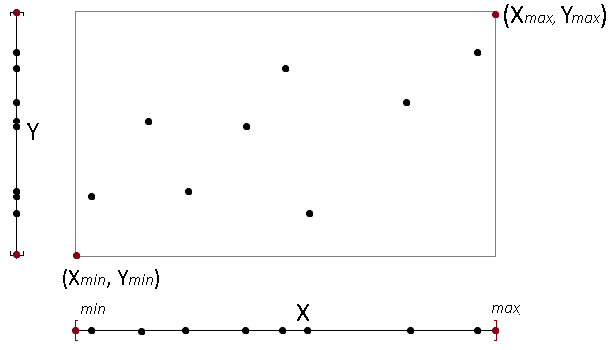

New code with updated criteria

In [ ]:
class HipercubeDRuleInductor:
  def __init__(self, X:np.ndarray, cluster:np.ndarray, dim:int)->None:
    self.__X = X
    self.__n = len(X)
    self.__C = cluster
    self.__D = dim

  def __linearize_dim_boundary(self, X:np.ndarray)->list:
    d_hyper_vector = list()
    for dim in range(0, self.__D):
      # we order from smallest to largest according to the corresponding dimension
      x_sorted_list = sorted(X, key=lambda x:x[dim])
      # its a point
      min_xi = x_sorted_list[0][dim]
      # its a point
      max_xi = x_sorted_list[-1][dim]
      d_hyper_vector.append((min_xi, max_xi))

    return d_hyper_vector

  def __get_total_clusters(self, cluster:np.ndarray)->dict:
    c_info = dict()
    for c in cluster:
      if c in c_info:
        c_info[c]+= 1
      else:
        c_info[c] = 1

    return c_info

  def __split_matrix(self, X:np.ndarray, cluster:np.ndarray, k:int)->list:
    cluster_matrix = list()
    for Xi, c in zip(X, cluster):
      if c == k:
        cluster_matrix.append(Xi)

    return cluster_matrix

  def __compute_hipercube_matrix(self, clusters:dict)->list:
    hipercube_matrix = list()
    for c, t in clusters.items():
      mat = self.__split_matrix(self.__X, self.__C, c)

      boundary_dict = dict()
      hvec = self.__linearize_dim_boundary(mat)
      for i, boundary in enumerate(hvec):
        boundary_dict['x'+str(i)] = boundary
        boundary_dict['proba'] = t/self.__n
        boundary_dict['class'] = c
      hipercube_matrix.append(boundary_dict)

    return hipercube_matrix

  def fit_transform(self)->None:
    c_info:dict = self.__get_total_clusters(self.__C)
    hipercube_matrix= self.__compute_hipercube_matrix(c_info)
    self.__sorted_hipercube_matrix = sorted(hipercube_matrix, key=lambda X: X['proba'], reverse=True)

    return self.__sorted_hipercube_matrix

  @property
  def rules_list(self)->list:
    rules = list()
    for hipervector in self.__sorted_hipercube_matrix:
      rule = ""
      for dim in range(0, self.__D, 1):
        x_dim ="x"+str(dim)
        min_boundary = hipervector[x_dim][0]
        max_boundary = hipervector[x_dim][1]
    
        rule += "("+x_dim+'>='+str(min_boundary)+")" + '^' + "("+x_dim+'<='+str(max_boundary)+")"+'^'
      # omit the last symbol
      rules.append(rule[:-1])
    
    return rules

# Uniform distribution experiment with the criterion of linearization of dimensions

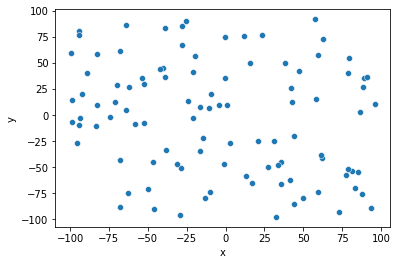

In [ ]:
x = np.random.uniform(low=-100,high=100, size=100)
y = np.random.uniform(low=-100,high=100, size=100)
df_unif = pd.DataFrame(data={'x':x,'y':y})

sns.scatterplot(data=df_unif, x='x',y='y')
plt.show()

again, we resize the data and do the clustering

In [ ]:
kmeans = KMeans(n_clusters=4).fit(MinMaxScaler().fit_transform(df_unif))
df_unif["cluster"] = kmeans.labels_
df_unif.head()

,x,y,cluster
0,44.208635,-20.366031,0
1,-28.693877,-50.848938,3
2,42.638192,12.730197,2
3,-9.754868,-74.314515,3
4,3.062362,-26.748427,3


*let's execute the new model*

In [ ]:
hc_inductor = HipercubeDRuleInductor(df_unif[['x', 'y']].values, df_unif['cluster'].values, 2)
hc_mat = hc_inductor.fit_transform()
hc_mat

[{'class': 1,
  'proba': 0.39,
  'x0': (-99.61275562672401, 0.6355675013163307),
  'x1': (-10.291041373999605, 89.51585112691242)},
 {'class': 0,
  'proba': 0.24,
  'x0': (12.978891907991567, 93.37023383708129),
  'x1': (-97.81473993830521, -20.366031093705956)},
 {'class': 2,
  'proba': 0.2,
  'x0': (-0.6309621005451618, 96.17222143334087),
  'x1': (2.7917311638450286, 91.63288823706003)},
 {'class': 3,
  'proba': 0.17,
  'x0': (-95.26130861105612, 3.062361917920711),
  'x1': (-95.93937586784268, -22.226200941811115)}]

list of generated rules

In [ ]:
hc_inductor.rules_list

['(x0>=-99.61275562672401)^(x0<=0.6355675013163307)^(x1>=-10.291041373999605)^(x1<=89.51585112691242)',
 '(x0>=12.978891907991567)^(x0<=93.37023383708129)^(x1>=-97.81473993830521)^(x1<=-20.366031093705956)',
 '(x0>=-0.6309621005451618)^(x0<=96.17222143334087)^(x1>=2.7917311638450286)^(x1<=91.63288823706003)',
 '(x0>=-95.26130861105612)^(x0<=3.062361917920711)^(x1>=-95.93937586784268)^(x1<=-22.226200941811115)']

Let's visualize the new regions delimited by the hypercube model

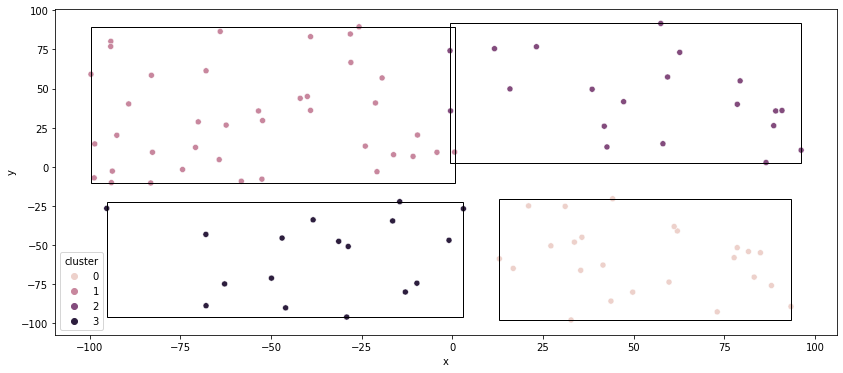

In [ ]:
from matplotlib.patches import Rectangle

plt.subplots(figsize=(14,6))
sns.scatterplot(data=df_unif, x='x',y='y', hue='cluster')

for hipervector in hc_mat:
  rect = Rectangle((hipervector['x0'][0], hipervector['x1'][0]), hipervector['x0'][1] - hipervector['x0'][0], hipervector['x1'][1] - hipervector['x1'][0], fill=False)
  
  plt.gca().add_patch(rect)

Conclusion:

**We obtain an improved classification!**, However, the algorithm may present collisions or intersections in certain occasions, this will be solved by adaptively adjusting the optimal cluster of the K-Means method.



# Final update of the Hypercube D-rule inductor model; prediction method, accuracy and hypercube intersection ratio.

Definitely the *criterion of linearized dimensions* is the best, however our model may present small flaws that cause misclassifications (due to linearization).

We must create another method that allows us to measure this, because when we raise the dimensions we will not be able to visually discriminate the regions of the plane that collide or remain unclassified.

---

To solve this we will assign by default the observation to the class with the highest weighting, i.e. rule number 0 (the most important). In symbols we will represent this with an "else".

> It is also necessary to implement a **predict** function (mainly to test the model). For demonstration and practical purposes the function represented will have a brute force approach, however for real performance testing the use of graphs is recommended.

On the other hand, the **accuracy** method will help us to measure the accuracy of the model (both in testing and training phase) and finally the **intercept ratio** will allow us to determine analytically the error in the training (internally it is nothing more than the complementary of the accuracy function).

In [ ]:
class HipercubeDRuleInductor:
  def __init__(self, X:np.ndarray, cluster:np.ndarray, dim:int)->None:
    self.__X = X
    self.__n = len(X)
    self.__C = cluster
    self.__D = dim

    self.markers = {'and':'and', 'or':'or', 'other_than':'!=', 'greater_equal':'>=', 'less_equal':'<=', 'open_condition':'(', 'close_condition':')', 'implies_that':'->', 'else':'else', 'misclassification':-1}
    self.__WEIGHTED_MAJOR_RULE = 0

  def __linearize_dim_boundary(self, X:np.ndarray):
    d_hyper_vector = list()
    for dim in range(0, self.__D):
      # we order from smallest to largest according to the corresponding dimension
      x_sorted_list = sorted(X, key=lambda x:x[dim])
      # its a point
      min_xi = x_sorted_list[0][dim]
      # its a point
      max_xi = x_sorted_list[-1][dim]
      d_hyper_vector.append((min_xi, max_xi))

    return d_hyper_vector

  def __get_total_clusters(self, cluster:np.ndarray)->dict:
    c_info = dict()
    for c in cluster:
      if c in c_info:
        c_info[c]+= 1
      else:
        c_info[c] = 1

    return c_info

  def __split_matrix(self, X:np.ndarray, cluster:np.ndarray, k:int)->list:
    cluster_matrix = list()
    for Xi, c in zip(X, cluster):
      if c == k:
        cluster_matrix.append(Xi)

    return cluster_matrix

  def __compute_hipercube_matrix(self, clusters:dict)->list:
    hipercube_matrix = list()
    # divide the matrix by clusters
    for c, t in clusters.items():
      mat = self.__split_matrix(self.__X, self.__C, c)

      boundary_dict = dict()
      hvec = self.__linearize_dim_boundary(mat)
      for i, boundary in enumerate(hvec):
        boundary_dict['x'+str(i)] = boundary
        boundary_dict['proba'] = t/self.__n
        boundary_dict['class'] = c
      hipercube_matrix.append(boundary_dict)

    return hipercube_matrix

  def fit_transform(self)->None:
    c_info:dict = self.__get_total_clusters(self.__C)
    hipercube_matrix= self.__compute_hipercube_matrix(c_info)
    self.__sorted_hipercube_matrix = sorted(hipercube_matrix, key=lambda X: X['proba'], reverse=True)

    return self.__sorted_hipercube_matrix

  @property
  def rules_list(self)->list:
    rules = list()
    open_marker:str   = self.markers['open_condition']
    close_marker:str  = self.markers['close_condition']
    implies_that_marker:str = self.markers['implies_that']

    or_marker:str   = self.markers['or']
    and_marker:str  = self.markers['and']
    otherthan_marker:str  = self.markers['other_than']
    greaterequal_marker:str = self.markers['greater_equal']
    lessequal_marker:str = self.markers['less_equal']

    for hipervector in self.__sorted_hipercube_matrix:
      rule = ""
      for dim in range(0, self.__D, 1):
        x_dim ="x"+str(dim)
        min_boundary = hipervector[x_dim][0]
        max_boundary = hipervector[x_dim][1]
    
        rule += open_marker+x_dim + greaterequal_marker + str(min_boundary) + close_marker + and_marker + open_marker + x_dim + lessequal_marker + str(max_boundary) + close_marker + and_marker

      # remove the last symbol
      rule = rule[:-len(and_marker)]
      rule+= implies_that_marker + str(hipervector['class'])
      
      rules.append(rule)
      
    # We use an 'else' to avoid leaving a region unclassified.
    rule = self.markers['else'] + implies_that_marker + str(self.__sorted_hipercube_matrix[0]['class'])
    rules.append( rule )

    return rules

  def fit_predict_(self, X_row:np.ndarray)->int:
    class_pred = self.markers['misclassification']
    for hipervector in self.__sorted_hipercube_matrix:
      bounded = 0
      # the observation belongs to the class with boundary delimited by the information in the hypervector variable
      for dim in range(0, self.__D, 1):
        v2 = hipervector['x'+str(dim)]
        v2_min = v2[0]
        v2_max = v2[1]

        if X_row[dim] >= v2_min and X_row[dim] <= v2_max:
          bounded+= 1

      if bounded == self.__D:
        class_pred = int(hipervector['class'])
        break

    # If the model does not know where to assign the observation,
    # it assigns it (by default) to the class with the highest weighting,
    # i.e. rule number 0 (the most important).
    if class_pred == self.markers['misclassification']:
      class_pred = self.__sorted_hipercube_matrix[self.__WEIGHTED_MAJOR_RULE]['class']

    return class_pred

  def fit_predict(self, X_test:np.ndarray)->list:
    classes = list()
    for X in X_test:
      classes.append( self.fit_predict_(X) )
    return classes

  def accuracy(self, real:np.ndarray, pred:np.ndarray)->float:
    acc = 0
    n = 0
    for r, p in zip(real, pred):
      if r == p:
        acc+= 1
      n+= 1

    return acc/n

  def hypercubes_intersection_ratio(self)->float:
    pred:list = self.fit_predict(self.__X)
    # accuracy of the model by comparing the actual classification (usually using K-Means) with that predicted by the model
    return 1 - self.accuracy(self.__C, pred)

# Experiment in R3 with intersection ratio and adaptive clustering

let's generate a new data set from 3 uniform distributions

In [ ]:
x = np.random.uniform(low=-100,high=100, size=100)
y = np.random.uniform(low=-100,high=100, size=100)
z = np.random.uniform(low=-100,high=100, size=100)
df_unif3 = pd.DataFrame(data={'x':x,'y':y, 'z':z})

kmeans = KMeans(n_clusters=4).fit(MinMaxScaler().fit_transform(df_unif3))
df_unif3["cluster"] = kmeans.labels_

let's use plotly to look at the model in 3-dimensions

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_unif3, x='x', y='y', z='z', color='cluster', opacity=0.7, symbol='cluster')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Let's train the model and extract the rules!

In [ ]:
hc_inductor = HipercubeDRuleInductor(df_unif3[['x', 'y', 'z']].values, df_unif3['cluster'].values, 3)
hc_inductor.fit_transform()

for rule in hc_inductor.rules_list:
  print(rule)

(x0>=-94.82610644393557)and(x0<=15.310688439707931)and(x1>=-7.17936242345975)and(x1<=92.92313251157657)and(x2>=-84.68563945043874)and(x2<=89.2414216473247)->1
(x0>=-93.71613052034387)and(x0<=93.4589030852571)and(x1>=-95.51179049668714)and(x1<=18.884885664677896)and(x2>=-9.417092296087475)and(x2<=97.42305112161958)->0
(x0>=-83.80370169311426)and(x0<=84.92377328334334)and(x1>=-99.99869426770074)and(x1<=-6.579000563021523)and(x2>=-97.35835766864342)and(x2<=-13.443103190515487)->3
(x0>=-43.536591777027624)and(x0<=99.7831497429489)and(x1>=5.785659435749977)and(x1<=98.53668968212187)and(x2>=-92.76057081506808)and(x2<=47.55970956350694)->2
else->1


Let's look at the intersection(failure) ratio of the generated regions in R3

In [ ]:
np.round(hc_inductor.hypercubes_intersection_ratio(), 2)

0.07

Let's visually compare the classified regions

In [ ]:
pred = hc_inductor.fit_predict(df_unif3[['x', 'y', 'z']].values)

df_unif3_pred = df_unif3.copy()
df_unif3_pred['pred'] = pred

fig = px.scatter_3d(df_unif3_pred, x='x', y='y', z='z', color='pred', opacity=0.7, symbol='pred')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

As we can see the classification error is negligible.

**Let's repeat the experiment with adaptive clustering**

In [ ]:
def adaptative_clustering(df_values:pd.DataFrame):
  df = df_values.copy()
  info = list()
  norm_unif3 = MinMaxScaler().fit_transform(df)

  for k in range(2, 15, 1):
    kmeans = KMeans(n_clusters=k).fit(norm_unif3)
    df["cluster"] = kmeans.labels_

    df_ = df[df.columns[:-1]]
    hc_inductor = HipercubeDRuleInductor(df_.values, df['cluster'].values, df_.shape[1])
    hc_inductor.fit_transform()
    
    intersection_ratio:float = hc_inductor.hypercubes_intersection_ratio()
    #print( "k={} -> intersection ratio:{}, acuraccy:{}".format(k, np.round(intersection_ratio, 2), np.round(1-intersection_ratio,2)))
    info.append((k, np.round(intersection_ratio, 2), np.round(1-intersection_ratio,2)))
  
  return pd.DataFrame(info, columns=['k', 'intersection-ratio', 'train-accuracy'])

df_k = adaptative_clustering(df_unif3)
df_k

,k,intersection-ratio,train-accuracy
0,2,0.37,0.63
1,3,0.25,0.75
2,4,0.14,0.86
3,5,0.07,0.93
4,6,0.06,0.94
5,7,0.05,0.95
6,8,0.05,0.95
7,9,0.01,0.99
8,10,0.01,0.99
9,11,0.02,0.98


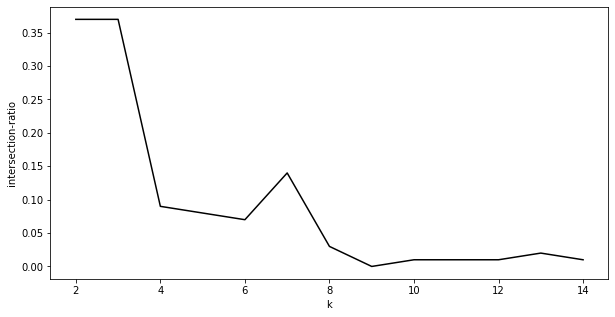

In [ ]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=df_k, x='k', y='intersection-ratio', color='black')
plt.show()

**Conclusion.**

As we can see, after a certain number of partitions (k-parameters) in the hyperplane, the classification failure rate drops drastically.

This does not mean that the higher the value of **k** the better the model, but rather it explains that there is an optimal **k** for which the classification does not present collisions between the hypercube boundaries.

# 5-dimensional final experiment; prediction, time-series splitting with adaptive clustering and optimized rule extraction

This experiment will be performed on a 5-dimensional dataset with 3000 observations (i.e. a matrix of 5 columns with 3000 rows).

In [ ]:
x = np.random.uniform(low=-300,high=450, size=3000)
y = np.random.uniform(low=-100,high=80, size=3000)
z = np.random.uniform(low=-200,high=700, size=3000)
w = np.random.uniform(low=-100,high=900, size=3000)
r = np.random.uniform(low=-200,high=150, size=3000)

df_unif5 = pd.DataFrame(data={'x':x,'y':y, 'z':z, 'w':w, 'r':r})
df_unif5.head()

,x,y,z,w,r
0,225.196713,-5.024146,657.867623,877.932551,-188.141369
1,391.309010,63.200091,389.184939,585.556553,29.581262
2,215.846247,-44.646523,508.594362,-46.593200,-94.278990
3,76.816841,-47.980803,-197.290522,-41.274848,-188.898650
4,264.018627,68.790674,572.737718,277.138215,12.603427


let's define a split function for time series, spliting the model into a training set and a test set as if it were a time series

In [ ]:
def timeserie_split(df:pd.DataFrame, n:int, train=0.70)->tuple:
  n_train = int(n * train)
  # train, test
  return df[:n_train], df[n_train:]

**prediction function with adaptive clustering**.

In [ ]:
def predict_adaptative_clustering(df_values:pd.DataFrame, k_max:int=18)->pd.DataFrame:
  #df = df_values.copy()
  n_rows = df_values.shape[0]
  n_dims = df_values.shape[1]
  norm_df = MinMaxScaler().fit_transform(df_values)
  info = list()
  df_train, df_test = timeserie_split(df_values, n_rows)

  for k in range(4, k_max+1, 1):
    kmeans = KMeans(n_clusters=k).fit(norm_df)

    clusters_train, clusters_test = timeserie_split(kmeans.labels_, n_rows)
    hc_inductor = HipercubeDRuleInductor(df_train.values, clusters_train, n_dims)
    hc_inductor.fit_transform()

    acc:float = hc_inductor.accuracy(clusters_test, hc_inductor.fit_predict(df_test.values))
    info.append((k, np.round(hc_inductor.hypercubes_intersection_ratio(),2), np.round(acc,2), hc_inductor.rules_list))

  return pd.DataFrame(info, columns=["k", "intersection-ratio", "test-accuracy", "rules"])

evaluation metrics

In [ ]:
df_model_pred = predict_adaptative_clustering(df_unif5)
df_model_pred

,k,intersection-ratio,test-accuracy,rules
0,4,0.34,0.62,[(x0>=1.6372726253936776)and(x0<=449.468216758...
1,5,0.55,0.40,[(x0>=-299.7358843164517)and(x0<=370.496829791...
2,6,0.65,0.32,[(x0>=-294.8528731755811)and(x0<=447.409666074...
3,7,0.68,0.26,[(x0>=-245.10809429223994)and(x0<=449.46821675...
4,8,0.70,0.26,[(x0>=-86.79567782123178)and(x0<=449.079654476...
5,9,0.59,0.34,[(x0>=-296.8829729058268)and(x0<=443.243003871...
6,10,0.62,0.31,[(x0>=-140.55472155017074)and(x0<=449.07965447...
7,11,0.55,0.41,[(x0>=-16.886470144468376)and(x0<=447.73510606...
8,12,0.62,0.35,[(x0>=-299.7358843164517)and(x0<=128.930552551...
9,13,0.44,0.49,[(x0>=-299.41228316687096)and(x0<=102.22969333...


**model prediction accuracy plot**

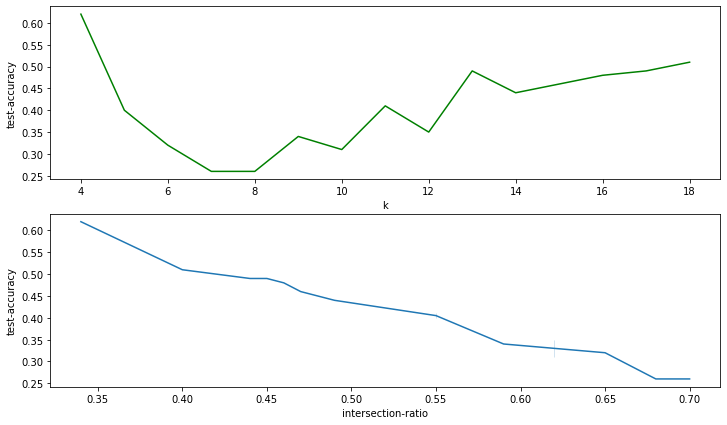

In [ ]:
_,axs = plt.subplots(figsize=(12,7), nrows=2)

sns.lineplot(data=df_model_pred, x='k', y='test-accuracy', color='green', ax=axs[0])
sns.lineplot(data=df_model_pred, x='intersection-ratio', y='test-accuracy', ax=axs[1])
plt.show()

**optimal set of rules**

In [ ]:
opt_rules = df_model_pred.sort_values(["test-accuracy"], ascending=False)["rules"].values[0]
for rule in opt_rules:
  print(rule)

(x0>=1.6372726253936776)and(x0<=449.4682167584484)and(x1>=-99.01244408195271)and(x1<=79.8647459780021)and(x2>=-199.3473202945423)and(x2<=699.4543060272401)and(x3>=-93.89226787086128)and(x3<=893.6615556541884)and(x4>=-125.66722862963366)and(x4<=149.95218766454178)->3
(x0>=-299.41228316687096)and(x0<=449.24896567677797)and(x1>=-99.79141438103534)and(x1<=79.0667461632834)and(x2>=-199.92063005157468)and(x2<=699.5425147301829)and(x3>=278.34866459102125)and(x3<=899.7926212385636)and(x4>=-199.7356420604292)and(x4<=117.38212410838497)->1
(x0>=-299.763365109686)and(x0<=175.13842949127468)and(x1>=-99.59493729594098)and(x1<=79.50697023799938)and(x2>=-199.66771027866739)and(x2<=697.0524864226946)and(x3>=-99.17917248027865)and(x3<=892.6432539070764)and(x4>=-106.73331352306437)and(x4<=149.9580806754916)->2
(x0>=-298.08830577927534)and(x0<=448.8221936883165)and(x1>=-99.61561927442408)and(x1<=79.77839396233577)and(x2>=-197.29052172724144)and(x2<=698.2607084827861)and(x3>=-99.76167971450735)and(x3<=603

**K-optimal**

In [ ]:
df_model_pred.sort_values(["test-accuracy"], ascending=False)["k"].values[0]

4

*Optional*: recompute the model to recalculate the prediction using the k-optimal. Another way to evaluate the metrics

In [ ]:
def recompute_model_pred(df_values:pd.DataFrame, df_model_pred:pd.DataFrame)->None:
  optimum_k:int = df_model_pred.sort_values(["test-accuracy"], ascending=False)["k"].values[0]
  df = df_values.copy()
  n_dims = df.shape[1]

  df_train, df_test = timeserie_split(df, df.shape[0])
  kmeans = KMeans(n_clusters=optimum_k).fit(MinMaxScaler().fit_transform(df))
  df["cluster"] = kmeans.labels_

  clusters_train, clusters_test = timeserie_split(df["cluster"].values, df.shape[0])

  hc_inductor = HipercubeDRuleInductor(df_train.values, clusters_train, n_dims)
  hc_inductor.fit_transform()

  acc:float = hc_inductor.accuracy(clusters_test, hc_inductor.fit_predict(df_test.values))
  print("optimum-k:{} hypercubes-intersection-rate:{} accuracy:{}".format(optimum_k, hc_inductor.hypercubes_intersection_ratio(),acc))
  print("--------------------------------------------------------------------------------------------------------------------")

  for rule in hc_inductor.rules_list:
    print(rule)

recompute_model_pred(df_unif5, df_model_pred)

optimum-k:4 hypercubes-intersection-rate:0.31666666666666665 accuracy:0.6477777777777778
--------------------------------------------------------------------------------------------------------------------
(x0>=29.30070212280083)and(x0<=449.4682167584484)and(x1>=-99.01244408195271)and(x1<=79.8647459780021)and(x2>=-199.3473202945423)and(x2<=699.4543060272401)and(x3>=-93.89226787086128)and(x3<=893.6615556541884)and(x4>=-110.20706006401328)and(x4<=149.95218766454178)->3
(x0>=-299.41228316687096)and(x0<=449.24896567677797)and(x1>=-99.79141438103534)and(x1<=79.0667461632834)and(x2>=-199.92063005157468)and(x2<=699.5425147301829)and(x3>=278.34866459102125)and(x3<=899.7926212385636)and(x4>=-199.7356420604292)and(x4<=117.38212410838497)->2
(x0>=-299.763365109686)and(x0<=142.11291736313876)and(x1>=-99.59493729594098)and(x1<=79.50697023799938)and(x2>=-199.66771027866739)and(x2<=697.0524864226946)and(x3>=-99.17917248027865)and(x3<=892.6432539070764)and(x4>=-104.99984968844203)and(x4<=149.958080675

**Conclusion:**

In general the stability of the model varies according to the **k** chosen, this is easy to see when compared to the ratio of intersections or classification failures. So by selecting an optimal value we see the trade-off between the quality of the prediction and the collisions between the hypercubes, let's also keep in mind that these experiments were performed on uniform distributions, and for practicality they were treated as time series (this does not necessarily have to be always the case).

Therefore the accuracy may improve or worsen depending on the stochastic nature of the problem and the classification range. Ideally, vary the homogeneity of classes and test the most effective hyperparameter.

# Final comments and reflections.

According to my research done so far this model does not represent the totality of the n-dimensions, but rather "linearizes" each of them separately using different techniques (they preserve the properties of Euclidean geometries, so they can treat these problems by projecting the high frontiers to a 1-cube according to Petrie's notation).

If you want to use the extracted rule set for some application or software, the list generated by the model is not enough, it is then necessary to use a tree graph because the approach used in this article for practical purposes is that of a brute force algorithm to implement the prediction function, this is not recommended in terms of speed optimization. For the time being this path will be left out of our analysis and will be covered in future research.